In [1]:
import numpy as np
import math
import seaborn as sns
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output
from scipy import special
from tqdm import tqdm_notebook
%matplotlib inline
r_seed = 1812
num_samples = 5000

## Function

In [2]:
def f_x (x) :
    f = (x**4 + (x-2)**2)
    return f

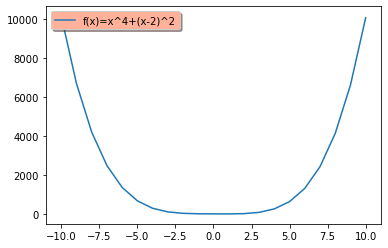

In [3]:
plt.ioff()
x = np.arange(-10, 11)
f = x**4 + (x-2)**2
fig, ax = plt.subplots()
 
ax.plot(x, f, linestyle='solid')
 
lgnd = ax.legend(['f(x)=x^4+(x-2)^2'], loc='upper left', shadow=True)
lgnd.get_frame().set_facecolor('#ffb19a')
 
plt.show()

# MC

In [4]:
def f_x_(x) :
    x1 = np.random.randint(0, x.size - 1)
    y = x[x1]
    return(y**4 + (y-2)**2)

In [5]:
sample_size = 5000
sigma = 0.4
mu_1 = 1
mu_2 = -2
np.random.seed(r_seed)
X1 = sigma * np.random.randn(sample_size) + mu_1
X2 = sigma * np.random.randn(sample_size) + mu_2
flag = np.random.binomial(1,0.5,size = sample_size)
X = flag*X1 + (1-flag)*X2

In [6]:
def MC (num_samples, r_seed):
    s = 0
    for i in range(num_samples) :
        s = s + f_x_(X)
    res = s/num_samples
    return (res)

In [7]:
buf0 = np.zeros((100,2),dtype = float)
r_seed = 1812
num_samples = 5000

for i in range(100):
    buf0[i] = MC(num_samples, r_seed+i)

print(buf0[:,0])

[19.78995332 19.18607054 18.99629724 19.62528514 19.9573849  19.49587622
 20.1831795  19.31084522 19.41535137 19.15440287 19.31554925 20.21316655
 19.32519433 19.60924312 19.47627847 19.99836683 19.7379323  19.54782775
 19.45639397 19.48607318 19.89222754 19.26562753 19.4802064  19.55952931
 19.92797471 19.1602664  19.74857539 19.05654773 20.42835541 19.15239377
 18.89843845 19.59983872 19.47770492 20.10913878 20.07484201 19.33191657
 19.80431067 19.52918322 19.47653425 19.50628565 19.58900263 19.07006935
 18.88997436 20.08530655 19.51128425 19.58130936 19.97026672 19.27607497
 19.71204213 19.4837657  19.26728407 19.81055426 19.36051652 20.17386904
 19.40468003 20.02895994 19.91007695 19.24197881 19.78117534 20.00005345
 19.49223205 19.80981066 19.61876142 19.34062256 19.73091482 19.64529397
 19.8188527  19.97268392 19.78481254 19.69420748 19.57014942 19.26546425
 19.00045858 20.07473728 19.92678252 19.74746819 19.77947119 19.05718283
 19.26391774 19.74941131 19.62878773 19.02813324 19

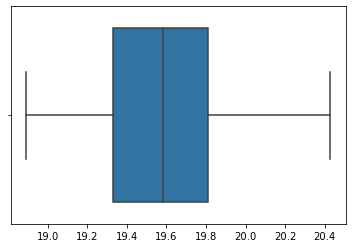

In [8]:
%matplotlib inline
ax = sns.boxplot(x = buf0[:,0])
plt.show()

# MC in the range

In [9]:
def fun_x (x) :
    return (1/(2*np.sqrt(2*np.pi)*0.4))*f_x(x)*((np.exp((-(x-1)**2/0.32)))+(np.exp((-(x+2)**2/0.32))))

In [10]:
def IS (num_samples, r_seed) :
    start = -4
    end = 4
    np.random.seed(r_seed)
    x_arr = np.random.uniform(low=start, high=end, size=num_samples)
    f_vals = (end - start)*fun_x(x_arr)
    var = np.var(f_vals)/num_samples
    mean = np.mean(f_vals)
    return (mean,var)

In [11]:
buf = np.zeros((100,2),dtype = float)
r_seed = 1812
num_samples = 5000

for i in range(100):
    buf[i] = IS(num_samples,r_seed+i)
    
print(buf[:,0])

[19.53882796 19.22081565 20.04998172 20.28875177 19.62466492 19.09014778
 18.83137547 19.43904305 19.42546515 19.58387287 19.23535202 19.56699548
 19.23219583 18.2512752  19.40937499 19.14089814 19.90177119 19.10272837
 18.99279402 20.17854843 19.61660249 19.84350651 19.79520494 19.90638896
 19.68003567 20.24081063 19.1354165  20.15086915 20.02359015 19.97538471
 20.1050276  18.80401713 19.49070981 19.77567699 19.48223848 19.23639902
 20.42722646 18.84998798 19.55327966 19.28556425 19.27417919 20.51528552
 19.262895   19.88653619 20.39429881 18.20473442 19.47825148 19.96891186
 20.00547665 19.57353367 18.9282407  19.38683006 19.05567501 18.55763144
 19.22231527 19.37658139 18.65490309 19.06268155 19.5849755  19.96955746
 18.71267301 19.53537872 19.37315472 19.22364213 20.90264675 20.28667399
 19.66071171 19.0507813  20.07186756 19.85133089 18.73910214 20.70559707
 19.41626121 19.86830196 19.30424296 19.87035886 19.86585873 18.83006155
 19.68181844 19.59289295 19.93333349 19.77130859 19

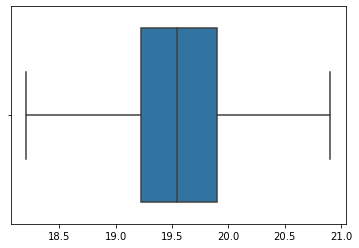

In [12]:
%matplotlib inline
ax = sns.boxplot(x = buf[:,0])
plt.show()

In [13]:
def funp_x (x) :
    x1 = np.random.randint(0, x.size - 1)
    y = x[x1]
    return ((3.2/math.sqrt(2*np.pi))*np.exp(-((y-1.35)**2)/0.3))

# ISp

In [14]:
sample_size = 5000
sigma = 0.4
mu_1 = 1
mu_2 = -2
np.random.seed(r_seed)
X1 = sigma * np.random.randn(sample_size) + mu_1
X2 = sigma * np.random.randn(sample_size) + mu_2
flag = np.random.binomial(1,0.5,size = sample_size)
X = flag*X1 + (1-flag)*X2

In [15]:
def f_x_(x) :
    x1 = np.random.randint(0, x.size - 1)
    y = x[x1]
    return (y**4 + (y-2)**2)

In [16]:
def pi (x) :
    x1 = np.random.randint(0, x.size - 1)
    y = x[x1]
    function = (1/(2*np.sqrt(2*np.pi)*0.4))*(np.exp(-(y-1)**2/0.32)+np.exp(-(y+2)**2/0.32))
    return (function)

In [17]:
def g_x (x, lamda, A) :
    x1 = np.random.randint(0, x.size - 1)
    y = x[x1]
    function = A*np.exp(-lamda*y)
    return (function)

In [18]:
def get_IS_variance(lamda, A, num_samples):
    
    # get sum of squares
    running_total = 0
    for i in range(num_samples):
        running_total +=(f_x_(X)/g_x (X, lamda, A))**2
    
    sum_of_sqs = running_total / num_samples
    
    # get squared average
    running_total = 0
    for i in range(num_samples):
        running_total += f_x_(X)/g_x (X, lamda, A)
    sq_ave = (running_total/num_samples)**2
    
    
    return sum_of_sqs - sq_ave

In [19]:
test_lamdas = [i*0.05 for i in range(1, 61)]
test_A = [i*0.05 for i in range(1, 61)]
variances = []

for i in range(60):
    for j in range(60):
        print(f"lambda {i+1}/{60}: {test_lamdas[i]}")
        print(f"A {j+1}/{60}: {test_A[j]}")
        variances.append(get_IS_variance(test_lamdas[i], test_A[i], 5000))
        clear_output(wait=True)

min_var = np.argmin(np.asarray(variances))
optimal_lamda = test_lamdas[min_var // 60]
optimal_A = test_A [min_var % 60]
IS_variance = variances[np.argmin(np.asarray(variances))]

print(f"Optimal Lambda: {optimal_lamda}")
print(f"Optimal A: {optimal_A}")
print(f"Optimal Variance: {IS_variance}")
print((IS_variance/5000)**0.5)

Optimal Lambda: 0.7000000000000001
Optimal A: 1.0
Optimal Variance: 2463.8958995849753
0.7019823216556063


In [52]:
def g1_x (x) :
    x1 = np.random.randint(0, x.size - 1)
    y = x[x1]
    function = 1.189*np.exp(-0.70000000001*y)
    return (function)

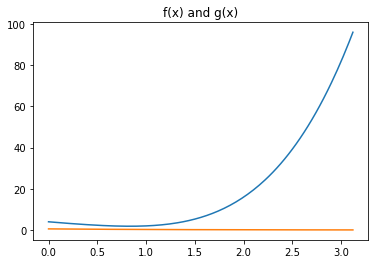

In [26]:
xs = [float(i/50) for i in range(int(50*np.pi))]
fs = [x**4 + (x-2)**2 for x in xs]
gs = [0.55*np.exp(-0.75*x) for x in xs]
plt.plot(xs, fs)
plt.plot(xs, gs)
plt.title("f(x) and g(x)");

In [31]:
def ISp (num_samples, r_seed):
    s = 0
    for i in range (num_samples):
        s = s + (f_x_(X)/g1_x(X))
    res = s/num_samples
    var = np.var(s)/num_samples
    return (res, var)

In [53]:
buf2 = np.zeros((100,2),dtype = float)
r_seed = 1812
num_samples = 5000

for i in range(100):
    buf2[i] = ISp(num_samples,r_seed+i)
    
print(buf2[:,0])

[19.76076087 19.45481045 19.29017623 19.69714318 19.75570599 20.30662266
 19.88751459 19.61969519 20.31788134 20.01666339 19.42162622 20.02235566
 20.29478926 19.37697233 20.090827   19.94909003 19.83229709 19.1564818
 20.05782883 19.77924329 19.52472692 20.5885496  19.05099034 18.76365946
 18.92906838 19.3086739  19.58989893 19.53149446 19.24369721 19.36782522
 18.98623945 19.85775759 19.25764941 19.67557877 19.72634724 18.90612484
 19.84156865 19.42032247 19.58485977 19.54962571 19.5617668  19.67539745
 19.46638656 19.22345723 19.9401627  19.15385964 19.50610449 19.36579851
 19.63222492 19.05305653 19.37189088 19.839823   18.9887824  19.15025206
 19.11318342 19.74432345 19.32336991 18.8446765  20.32484214 20.34669686
 19.92333615 18.72300406 19.23584913 20.25002982 19.35668565 19.03252356
 20.2556497  19.17934565 18.79628393 20.10543456 20.23188384 19.91214312
 20.65987568 19.10574915 20.10849525 19.43022526 19.62618455 19.29948551
 19.17076542 19.10167748 19.68840765 19.80335954 20.

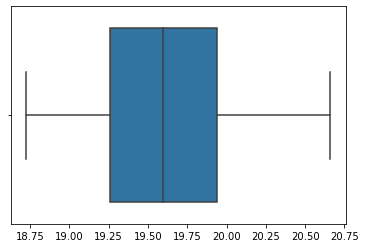

In [54]:
%matplotlib inline
ax = sns.boxplot(x = buf2[:,0])
plt.show()